# Importing necessary libraries

In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Reading data from CSV file

In [106]:
headings = ["Age","Operation Year","Axillary nodes","Survival Status"]
data = pd.read_csv("haberman.csv",header = None,names = headings )
data.head()

,Age,Operation Year,Axillary nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Data information :
<ol>
    <li><h3>Collected from : Billings Hospital, Chicago</h3></li>
    <li><h3>Years : 1958 - 1970 (12 years)</h3></li>
    <li><h3>About : Cases of surivial of patients who had undergone surgery for breast cancer</h3></li>
    <li><h3>Four attributes :</h3><br>
    <ol>
        <li> <b> Age</b> : Patients age </li>
        <li>  <b>Operatoin Year</b> : Year the patient underwent surgery </li>
        <li>  <b>Axillary nodes</b> : Number of positive axillary nodes detected (Lymph nodes under the armpits)</li>
        <li> <b>Survival Status</b> : "1" is the patietn survived after 5 years or "2" the patient didn't survive in the first 5 years</li>
        </ol></li>
        
</ol>
    <br><br>

##### Data donor : Tjen-Sien Lim (limt@stat.wisc.edu)
##### Get the data at : https://www.kaggle.com/gilsousa/habermans-survival-data-set

# High level statistics of data


In [107]:
data.describe()

,Age,Operation Year,Axillary nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation Year   306 non-null    int64
 2   Axillary nodes   306 non-null    int64
 3   Survival Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## Inferences:
<ul>
    <li>There are no null or missing values in the dataset. Relatively clean</li>
    <li>The "Survival Status" is numeric. Useful for classification but does not help in exploration of data.</li>
    <li>Large difference between mn and max of age. Could be a good feature for classification</li>
    <li>Although max of "Axillary Nodes" is 52 , most values are within 4 (75%)</li>

# Number of rows and columns and unique classes
 Survival Status is numeric i.e 1 or 2, which is useful for classification and not exploration.

In [109]:
print("Nmmber of columns", data.shape[0])
print("Number of rows",data.shape[1])
print("Number of classes",data["Survival Status"].unique())
print("Columns are :", ", ".join(data.columns))

Nmmber of columns 306
Number of rows 4
Number of classes [1 2]
Columns are : Age, Operation Year, Axillary nodes, Survival Status


### Converting "Survival Status" to categorical data from numeric 

In [110]:
target = np.array(data["Survival Status"])
data["Survival Status"] = data["Survival Status"].map({1:"Yes",2:"No"}).astype("category")
data.head()

,Age,Operation Year,Axillary nodes,Survival Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              306 non-null    int64   
 1   Operation Year   306 non-null    int64   
 2   Axillary nodes   306 non-null    int64   
 3   Survival Status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


The dtype of Survival Status has changed

# Finding class distribution

Number of people who survived after 5 years:  225
Number of people who did not survive after 5 years:  81


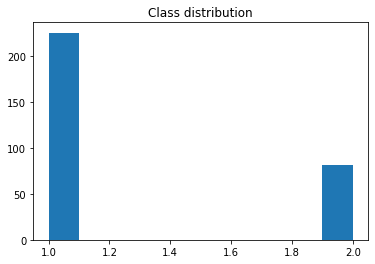

In [48]:
plt.hist(target, bins = "auto")
plt.title("Class distribution")
plt.plot()
print("Number of people who survived after 5 years: ",np.where(target == 1)[0].shape[0])
print("Number of people who did not survive after 5 years: ",np.where(target == 2)[0].shape[0])

## Inferences:
<ul>
    <li>Two distinct classes</li>
    <li>The distribution is higher towards the survived patients ("1" or"Yes"). Class "Yes" is 2.77 times higher than class "No"</li>
    <li>Could introduce bias in the classifier </li>
 </ul>

# Objective
<p> To explore the data and find the features most useful for classification. To this end understanding every attribute becomes important 

# Univariate Analysis
## Plotting histograms
<p> Histograms have been plotted for every attribute and hue is segregating them based on "Surivival Status"
    These histograms depict frequency of data points. Essentially depicting distribution.
    Divide the counts by the total counts gives us the Probability Density which tells us how likely a a data point is to fall in that bin. </p>

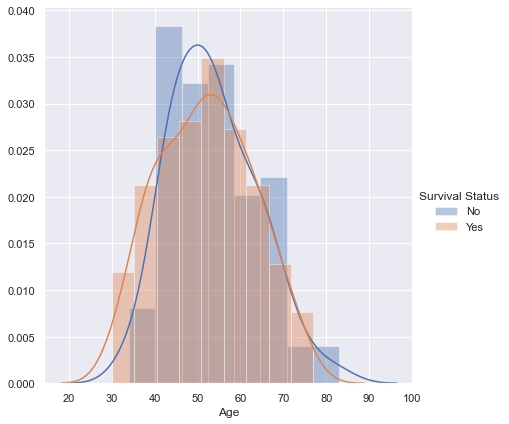

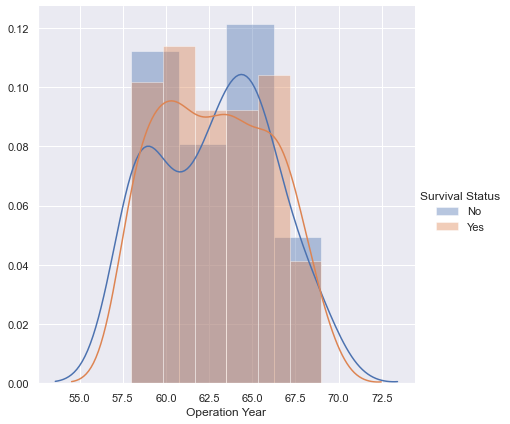

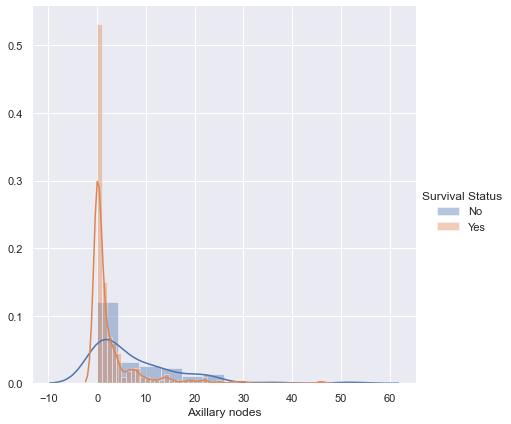

In [100]:
for col in data.columns[:-1]:
    fg = sns.FacetGrid(data, hue='Survival Status', height = 6)
    fg.map(sns.distplot, col).add_legend()
plt.show()

## Inferences : 
<ul>
    <li>Age of surviving patients is generally higher than patients who did not survive</li>
    <li>Earlier operations seem to be more successful than later operations. Need more data to verify</li>
    <li>The recovered patients had a significant higher probability of having zero to five positive axillary nodes or lesser (53% for range[1-3])</li>
</ul>


## Plotting boxplots
<p> Boxplots show the min,max,median,25% quartile and 75% quartile and serve as a comparison tool for statistical moments of different classes.<p>

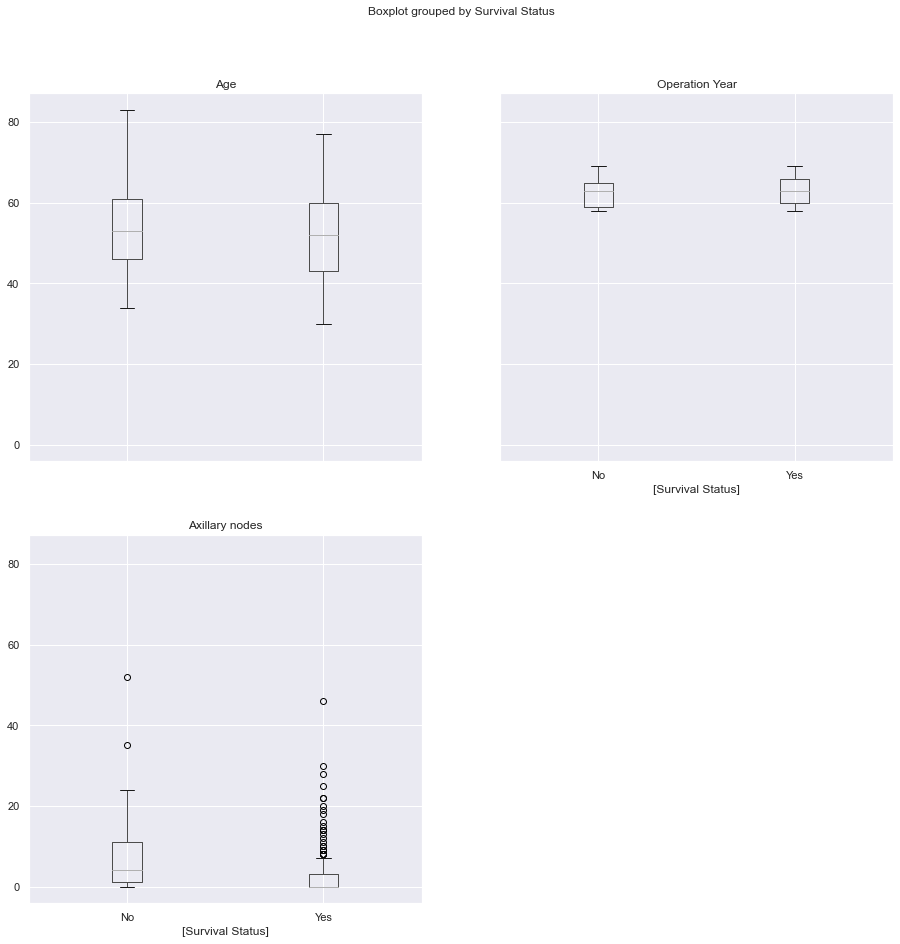

In [112]:
sec = data.copy()
sec["targets"] = target
boxplt = sec.boxplot(column = ["Age","Operation Year","Axillary nodes"],by = ["Survival Status"],figsize = (15,15))

## Inferences :
<ul>
    <li>The median of age for Suriving patients is noticeable lower than that of patients who did not survive. Lower age could mean better chances of survival. Although the significant overlap of the two classes doesn't help</li>
    <li>The Number of axillary nodes of surviving patients is definitely low compared to the non surviving patients </li>
    
<ul>

## Plotting CDF 
<p> CDF or cumulative density function is the cumulative sum of the probability density function. It showcases which range of values conntribute significantly to the distribution of data. It is a probability that the function takes a value less than or equal to the data

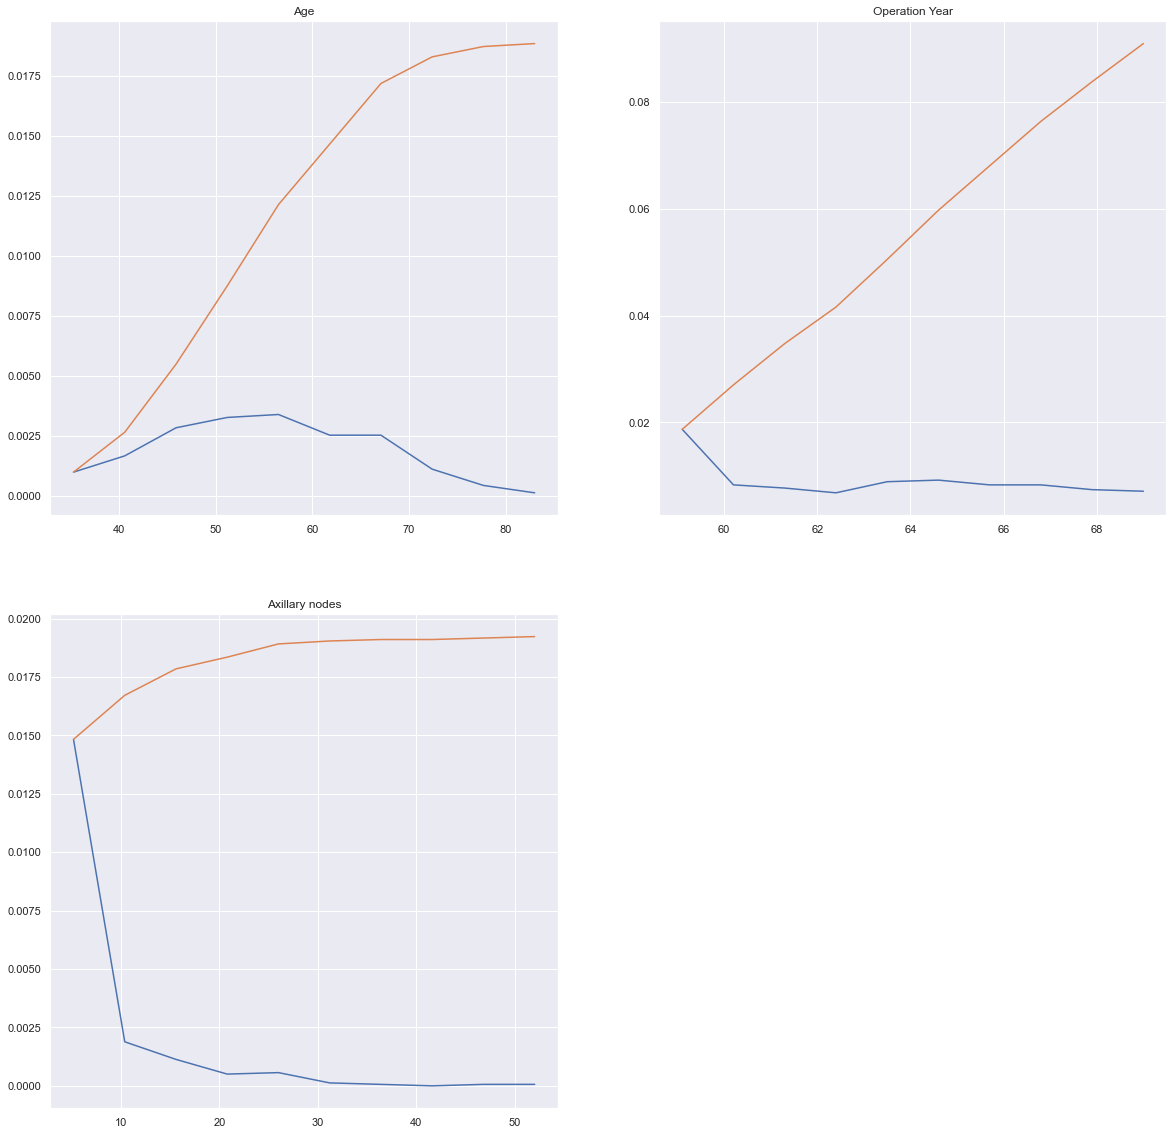

In [118]:
plt.figure(figsize = (20,20))
for idx, col in enumerate(data.columns[:-1]):
    plt.subplot(2,2,idx + 1)
    nums, bins = np.histogram(data[col],bins = 10,density = True)
    pdf = nums/(len(nums))
    cdf = np.cumsum(pdf)
    plt.title(col)
    plt.plot(bins[1:],pdf,bins[1:],cdf)
    

## Plotting Violin plots
Can be viewed as a probability density function that is plotted on top of a box and whisker plot

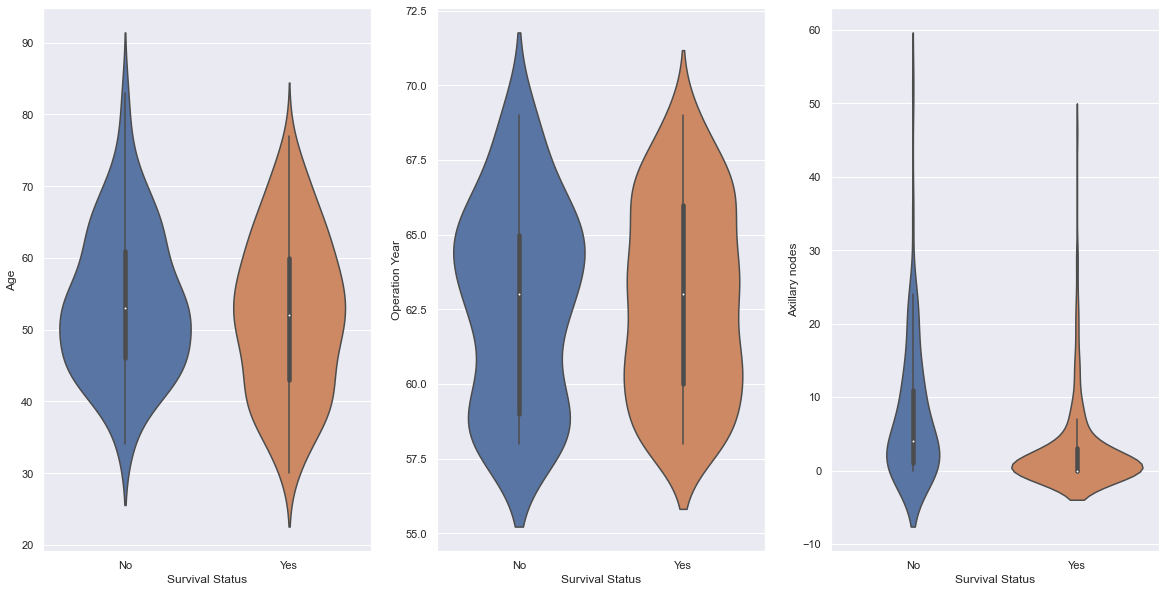

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for idx, col in enumerate(data.columns[:-1]):
    sns.violinplot( x='Survival Status', y=col, data=data, ax=axes[idx])
plt.show()

## Inferences :
<ul>
    <li>Lower positive lymph nodes definitely have an impact on the sruvival rate </li>
    <li>The survival rate as a little lower in the early years, 1968 </li>
    
<ul>

# MutliVariate Analysis

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


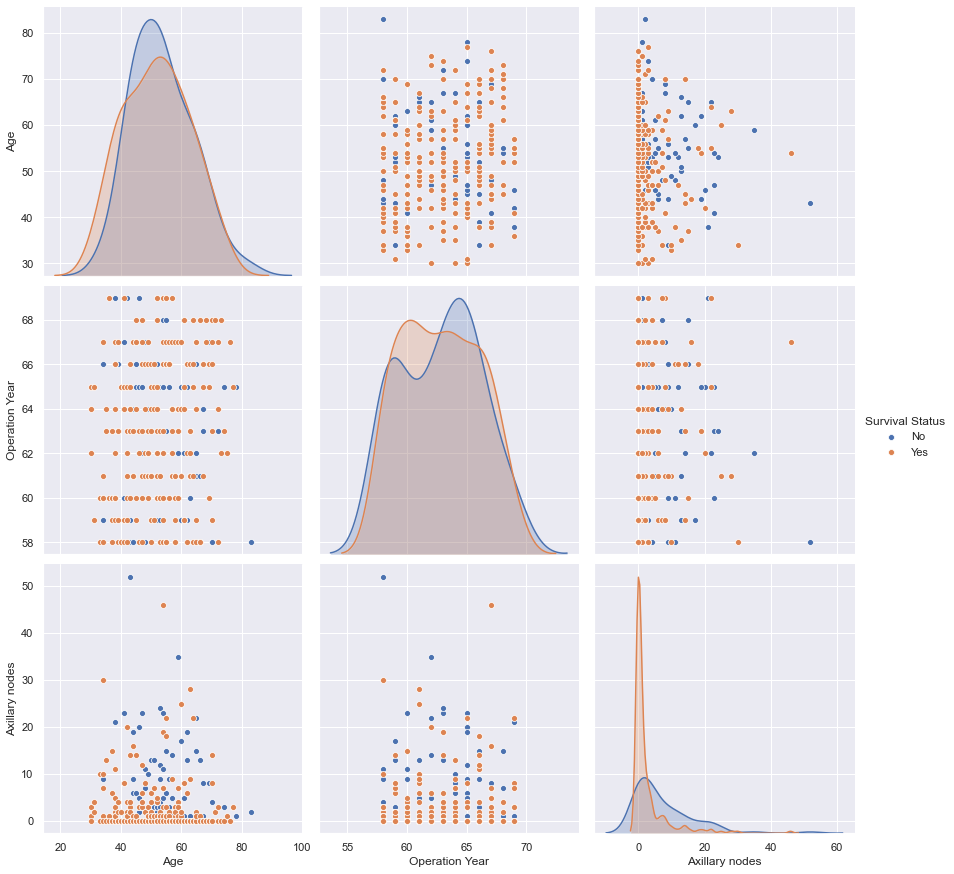

In [95]:
sns.pairplot(data, hue='Survival Status', size=4)
plt.show()

## Inferences :
<ul>
    <li>Plotting scatter between Age and positive axillary nodes gives good spearation but could also lead to a majority classifier (Because of class distribution)</li>
    <li>The operation year and the axillary nodes could aslo serve as a good plot for viewing separation.</li>
    
<ul>

<center><h3>End of notebook</h3></center>